## PROJECT WORK - AAI 520 - Fintech Agent 

In [14]:
!pip install yfinance python-dotenv matplotlib pandas


In [20]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from dotenv import load_dotenv

# Load your env file (Windows-friendly name)
load_dotenv("keys.env")  # safe even if file is missing

# Create folders for artifacts
os.makedirs("data/prices", exist_ok=True)
os.makedirs("runs", exist_ok=True)

print("Env loaded. OPENAI_API_KEY present? ", bool(os.getenv("OPENAI_API_KEY")))


Env loaded. OPENAI_API_KEY present?  True


In [24]:
TICKER = "NVDA"
WINDOW_DAYS = 100

ticker = yf.Ticker(TICKER)
hist = ticker.history(period=f"{WINDOW_DAYS}d")  # daily data

if hist.empty:
    raise ValueError(f"No price data returned for {TICKER}")

hist.tail()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-10-06 00:00:00-04:00,185.500000,187.229996,183.330002,185.539993,157678100,0.0,0.0
2025-10-07 00:00:00-04:00,186.229996,189.059998,184.000000,185.039993,140088000,0.0,0.0
2025-10-08 00:00:00-04:00,186.570007,189.600006,186.539993,189.110001,130168900,0.0,0.0
2025-10-09 00:00:00-04:00,192.229996,195.300003,191.059998,192.570007,182997200,0.0,0.0
2025-10-10 00:00:00-04:00,193.509995,195.619995,182.050003,183.160004,266534400,0.0,0.0


In [26]:
hist.shape

(100, 7)

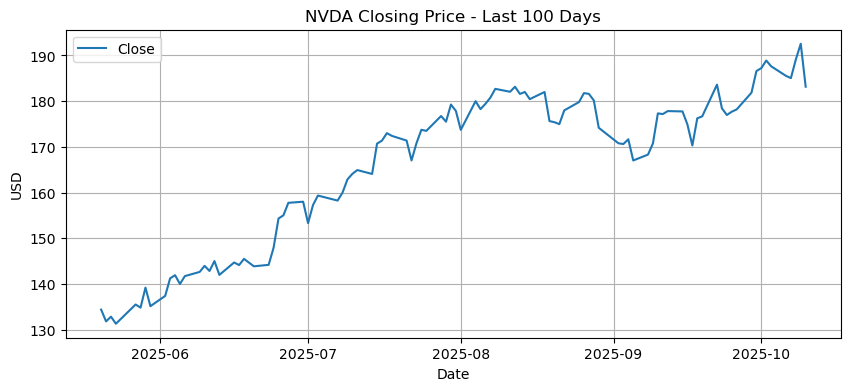

In [28]:
plt.figure(figsize=(10, 4))
plt.plot(hist.index, hist["Close"], label="Close")
plt.title(f"{TICKER} Closing Price - Last {WINDOW_DAYS} Days")
plt.xlabel("Date")
plt.ylabel("USD")
plt.legend()
plt.grid(True)
plt.show()


In [30]:
price_path = f"data/prices/{TICKER}_prices_{WINDOW_DAYS}d.csv"
hist.to_csv(price_path)

run_note = f"Fetched {TICKER} last {WINDOW_DAYS} days: {len(hist)} rows."
with open("runs/m1_prices.log", "a", encoding="utf-8") as f:
    f.write(run_note + "\n")

print("Saved:", price_path)
print(run_note)


Saved: data/prices/NVDA_prices_100d.csv
Fetched NVDA last 100 days: 100 rows.


#### Cell 6 — Reusable helper (promote later to src/tools/prices.py)

In [120]:
from typing import Tuple

def fetch_prices(ticker: str, window_days: int = 30) -> Tuple[pd.DataFrame, str]:
    """
    Fetch daily price history for `ticker` for the past `window_days` using yfinance.
    Saves CSV to data/prices/ and returns (DataFrame, csv_path).
    """
    t = yf.Ticker(ticker)
    df = t.history(period=f"{window_days}d")
    if df.empty:
        raise ValueError(f"No price data returned for {ticker}.")
    path = f"data/prices/{ticker}_prices_{window_days}d.csv"
    df.to_csv(path)
    return df, path

# quick test
df_nvda, path_nvda = fetch_prices("NVDA", 7)
print(df_nvda.tail())
print("Saved to:", path_nvda)


                                 Open        High         Low       Close  \
Date                                                                        
2025-10-02 00:00:00-04:00  189.600006  191.050003  188.059998  188.889999   
2025-10-03 00:00:00-04:00  189.190002  190.360001  185.380005  187.619995   
2025-10-06 00:00:00-04:00  185.500000  187.229996  183.330002  185.539993   
2025-10-07 00:00:00-04:00  186.229996  189.059998  184.000000  185.039993   
2025-10-08 00:00:00-04:00  186.570007  189.600006  186.539993  189.110001   

                              Volume  Dividends  Stock Splits  
Date                                                           
2025-10-02 00:00:00-04:00  136805800        0.0           0.0  
2025-10-03 00:00:00-04:00  137596900        0.0           0.0  
2025-10-06 00:00:00-04:00  157678100        0.0           0.0  
2025-10-07 00:00:00-04:00  140088000        0.0           0.0  
2025-10-08 00:00:00-04:00  129778900        0.0           0.0  
Saved to: da

#### (Optional) Cell 7 — Peek at financial statements

In [123]:
financials = ticker.financials
balance_sheet = ticker.balance_sheet
cashflow = ticker.cashflow

print("=== Income Statement (head) ===")
display(financials.head())

print("=== Balance Sheet (head) ===")
display(balance_sheet.head())

print("=== Cashflow (head) ===")
display(cashflow.head())


=== Income Statement (head) ===


,2025-01-31,2024-01-31,2023-01-31,2022-01-31
Tax Effect Of Unusual Items,0.000000e+00,0.000000e+00,-2.841300e+08,0.000000e+00
Tax Rate For Calcs,1.330000e-01,1.200000e-01,2.100000e-01,1.900000e-02
Normalized EBITDA,8.613700e+10,3.558300e+10,7.339000e+09,1.135100e+10
Total Unusual Items,0.000000e+00,0.000000e+00,-1.353000e+09,0.000000e+00
Total Unusual Items Excluding Goodwill,0.000000e+00,0.000000e+00,-1.353000e+09,0.000000e+00


=== Balance Sheet (head) ===


,2025-01-31,2024-01-31,2023-01-31,2022-01-31,2021-01-31
Treasury Shares Number,NaN,NaN,NaN,NaN,1.380000e+10
Ordinary Shares Number,2.447700e+10,2.464000e+10,2.466137e+10,2.506000e+10,NaN
Share Issued,2.447700e+10,2.464000e+10,2.466137e+10,2.506000e+10,NaN
Net Debt,NaN,2.429000e+09,7.564000e+09,8.956000e+09,6.116000e+09
Total Debt,1.027000e+10,1.105600e+10,1.203100e+10,1.183100e+10,NaN


=== Cashflow (head) ===


,2025-01-31,2024-01-31,2023-01-31,2022-01-31,2021-01-31
Free Cash Flow,6.085300e+10,2.702100e+10,3.808000e+09,8.132000e+09,NaN
Repurchase Of Capital Stock,-3.370600e+10,-9.533000e+09,-1.003900e+10,0.000000e+00,NaN
Repayment Of Debt,-1.250000e+09,-1.250000e+09,0.000000e+00,-1.000000e+09,NaN
Issuance Of Debt,NaN,0.000000e+00,0.000000e+00,4.977000e+09,4.968000e+09
Capital Expenditure,-3.236000e+09,-1.069000e+09,-1.833000e+09,-9.760000e+08,NaN


### Milestone 2 

In [19]:
!pip install requests python-dotenv pandas feedparser beautifulsoup4 tqdm python-dateutil


In [126]:
import os, json, time, re, math, requests, feedparser
import pandas as pd
from bs4 import BeautifulSoup
from tqdm import tqdm
from datetime import datetime, timedelta, timezone
from dateutil import parser as dateparser
from dotenv import load_dotenv

load_dotenv("keys.env")  # expects NEWSAPI_KEY inside (optional for SEC)
NEWSAPI_KEY = os.getenv("NEWSAPI_KEY")

os.makedirs("data/news", exist_ok=True)
os.makedirs("data/filings/raw_html", exist_ok=True)
os.makedirs("data/filings/clean_text", exist_ok=True)

print("NEWSAPI key present? ", bool(NEWSAPI_KEY))


NEWSAPI key present?  True


#### Part A — Financial News (NewsAPI)
#### Cell 3 — Helper: fetch last N days of news

In [129]:
def fetch_news_newsapi(query: str, days: int = 7, page_size: int = 50, max_pages: int = 2):
    """
    Fetch recent news via NewsAPI (requires NEWSAPI_KEY in keys.env).
    Returns a list of dicts with minimal fields.
    """
    if not NEWSAPI_KEY:
        raise RuntimeError("NEWSAPI_KEY missing in keys.env")

    to_date = datetime.utcnow().date()
    from_date = to_date - timedelta(days=days)

    base = "https://newsapi.org/v2/everything"
    headers = {"X-Api-Key": NEWSAPI_KEY}
    all_items = []

    for page in range(1, max_pages + 1):
        params = {
            "q": query,
            "from": from_date.isoformat(),
            "to": to_date.isoformat(),
            "sortBy": "publishedAt",
            "pageSize": page_size,
            "page": page,
            "language": "en"
        }
        r = requests.get(base, headers=headers, params=params, timeout=30)
        r.raise_for_status()
        data = r.json()
        items = data.get("articles", [])
        for a in items:
            all_items.append({
                "source_id": a.get("source", {}).get("id"),
                "source_name": a.get("source", {}).get("name"),
                "title": a.get("title"),
                "description": a.get("description"),
                "url": a.get("url"),
                "published_at": a.get("publishedAt"),
                "author": a.get("author"),
                "content": a.get("content")
            })
        if len(items) < page_size:
            break
        time.sleep(0.5)  # be polite
    return all_items
    


### Cell 4 — Helper: dedupe + save news

In [132]:
def dedupe_news(items):
    """
    Deduplicate by (normalized title, source_name). Returns list.
    """
    seen = set()
    out = []
    for it in items:
        title = (it.get("title") or "").strip().lower()
        title = re.sub(r"\s+", " ", title)
        key = (title, (it.get("source_name") or "").lower())
        if title and key not in seen:
            seen.add(key)
            out.append(it)
    return out

def save_json(obj, path):
    with open(path, "w", encoding="utf-8") as f:
        json.dump(obj, f, indent=2, ensure_ascii=False)


### Cell 5 — Run: fetch NVDA news (last 7 days)


In [136]:
# Robust NewsAPI fetch: prints error details, tries header & query auth, avoids 24h delay pitfall

import os, json, re, time, requests, pandas as pd
from datetime import datetime, timedelta
from dotenv import load_dotenv

load_dotenv("keys.env")
NEWSAPI_KEY = os.getenv("NEWSAPI_KEY")
if not NEWSAPI_KEY:
    raise ValueError("NEWSAPI_KEY missing in keys.env")

os.makedirs("data/news", exist_ok=True)

def fetch_news_newsapi_safe(query: str, days: int = 7, page_size: int = 50, max_pages: int = 2):
    url = "https://newsapi.org/v2/everything"

    # Free plan has ~24h delay: use up-to "yesterday" to avoid empty/error edge cases
    today_utc = datetime.utcnow().date()
    to_date = today_utc - timedelta(days=1)           # yesterday
    from_date = to_date - timedelta(days=days-1)      # N days ending yesterday

    all_items = []
    last_error = None

    for page in range(1, max_pages + 1):
        params = {
            "q": query,
            "from": from_date.isoformat(),
            "to": to_date.isoformat(),
            "language": "en",
            "sortBy": "publishedAt",
            "pageSize": page_size,
            "page": page,
        }

        # --- Try header auth first ---
        r = requests.get(url, headers={"X-Api-Key": NEWSAPI_KEY}, params=params, timeout=30)
        data = {}
        try:
            data = r.json()
        except Exception:
            pass

        if r.status_code == 200 and data.get("status") == "ok":
            items = data.get("articles", [])
            all_items.extend(items)
            if len(items) < page_size:
                break
            time.sleep(0.5)
            continue

        # --- If header auth failed, try apiKey in query ---
        params_with_key = dict(params)
        params_with_key["apiKey"] = NEWSAPI_KEY
        r2 = requests.get(url, params=params_with_key, timeout=30)
        data2 = {}
        try:
            data2 = r2.json()
        except Exception:
            pass

        if r2.status_code == 200 and data2.get("status") == "ok":
            items = data2.get("articles", [])
            all_items.extend(items)
            if len(items) < page_size:
                break
            time.sleep(0.5)
            continue

        # --- Collect debug info and stop trying this page ---
        last_error = {
            "first_try": {"status_code": r.status_code, "json": data},
            "second_try": {"status_code": r2.status_code, "json": data2},
            "params_used": params_with_key,
        }
        print("NewsAPI error on page", page, "→ debug dump below:")
        print(json.dumps(last_error, indent=2))
        break

    return all_items, last_error

def dedupe_news(items):
    seen, out = set(), []
    for it in items:
        title = (it.get("title") or "").strip().lower()
        title = re.sub(r"\s+", " ", title)
        source_name = ((it.get("source") or {}).get("name") or "").lower()
        key = (title, source_name)
        if title and key not in seen:
            seen.add(key)
            out.append({
                "source_id": (it.get("source") or {}).get("id"),
                "source_name": (it.get("source") or {}).get("name"),
                "title": it.get("title"),
                "description": it.get("description"),
                "url": it.get("url"),
                "published_at": it.get("publishedAt"),
                "author": it.get("author"),
                "content": it.get("content"),
            })
    return out

def save_json(obj, path):
    with open(path, "w", encoding="utf-8") as f:
        json.dump(obj, f, indent=2, ensure_ascii=False)

# ---- Run section ----
TICKER = "NVDA"
QUERY = "NVIDIA OR NVDA"

news_items_raw, debug_info = fetch_news_newsapi_safe(QUERY, days=7, page_size=50, max_pages=2)
news_items = dedupe_news(news_items_raw)

news_path = f"data/news/{TICKER}_news_last7.json"
save_json(news_items, news_path)

print(f"Saved {len(news_items)} deduped articles → {news_path}")

if news_items:
    display(pd.DataFrame(news_items)[["published_at", "source_name", "title"]].head(10))
elif debug_info:
    print("No articles saved. See debug info above for the exact 401/429/invalid-key message.")
else:
    print("No articles returned (possibly due to the free plan delay or narrow query). Try widening the date window.")


Saved 99 deduped articles → data/news/NVDA_news_last7.json


,published_at,source_name,title
0,2025-10-08T23:53:40Z,Biztoc.com,Gold Falls From Record as Traders Take Profit ...
1,2025-10-08T23:52:05Z,CNBC,"Asia-Pacific markets set to open higher, track..."
2,2025-10-08T23:42:21Z,Biztoc.com,Jensen Huang said his family wouldn't have bee...
3,2025-10-08T23:29:08Z,Business Insider,Jensen Huang said his family wouldn't have bee...
4,2025-10-08T23:20:21Z,Bloomberg,SoftBank-owned Graphcore to invest $1.3 billio...
5,2025-10-08T23:17:49Z,Yahoo Entertainment,"Stock market today: Dow, S&P 500, Nasdaq futur..."
6,2025-10-08T23:10:44Z,Slickdeals.net,Refurb: PNY GeForce RTX 5070 OC 12GB GDDR7 Gra...
7,2025-10-08T23:10:33Z,Theregister.com,CoreWeave bets on serverless agent builder to ...
8,2025-10-08T23:09:51Z,WSOC Charlotte,Financial institutions sound warning about an ...
9,2025-10-08T23:08:56Z,Biztoc.com,"Even after Stargate, Oracle, Nvidia and AMD, O..."


#### Part B — SEC EDGAR filings (no API key)

We’ll use the EDGAR Atom feed for a company CIK and download a few recent filings, then clean to plain text.

NVDA CIK is 0001045810. We can add more mappings later.

In [139]:
HEADERS = {
    # Set a descriptive User-Agent per SEC guidance
    "User-Agent": "StudentResearchAgent/1.0 your.email@example.com",
}

def get_company_feed_by_cik(cik: str, count: int = 20):
    """
    Returns parsed Atom feed entries for a given CIK.
    """
    url = f"https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK={cik}&type=&count={count}&owner=exclude&output=atom"
    r = requests.get(url, headers=HEADERS, timeout=30)
    r.raise_for_status()
    return feedparser.parse(r.text)

def fetch_url_text(url: str) -> str:
    r = requests.get(url, headers=HEADERS, timeout=30)
    r.raise_for_status()
    return r.text

def clean_html_to_text(html: str) -> str:
    soup = BeautifulSoup(html, "html.parser")
    # remove scripts/styles
    for tag in soup(["script", "style"]):
        tag.decompose()
    text = soup.get_text(separator="\n")
    # normalize whitespace
    text = re.sub(r"\n\s*\n+", "\n\n", text)
    text = re.sub(r"[ \t]+", " ", text)
    return text.strip()


#### Cell 7 — Helper: find candidate filings + download primary doc

In [142]:
def filter_entries_by_form(entries, form_types=("8-K","10-Q","10-K"), max_items=5):
    out = []
    for e in entries:
        title = e.get("title", "")
        # Titles look like: "10-Q - NVIDIA CORP (0001045810) (Filer)"
        if any(ft in title for ft in form_types):
            out.append(e)
        if len(out) >= max_items:
            break
    return out

def fetch_filing_documents(entry):
    """
    Given a feed entry, go to the filing page and try to extract primary document link(s).
    Returns list of dicts: [{doc_url, raw_html_path, clean_txt_path, form_type, filing_date, title}]
    """
    filing_page_url = entry.get("link")
    title = entry.get("title", "")
    filing_date = entry.get("updated") or entry.get("published")
    # Download filing page
    html = fetch_url_text(filing_page_url)
    soup = BeautifulSoup(html, "html.parser")

    # Heuristic: document table links contain 'Documents' or direct .htm/.html
    doc_links = []
    for a in soup.find_all("a", href=True):
        href = a["href"]
        if href.endswith((".htm", ".html")) and "Archives/edgar/data" in href:
            # Make absolute if needed
            if href.startswith("/"):
                doc_url = "https://www.sec.gov" + href
            elif href.startswith("http"):
                doc_url = href
            else:
                doc_url = "https://www.sec.gov/" + href
            doc_links.append(doc_url)

    # De-duplicate, keep a few
    seen = set()
    docs = []
    for doc_url in doc_links[:3]:
        if doc_url in seen: 
            continue
        seen.add(doc_url)
        try:
            raw_html = fetch_url_text(doc_url)
            clean_txt = clean_html_to_text(raw_html)

            # save artifacts
            ts = datetime.utcnow().strftime("%Y%m%dT%H%M%S")
            safe_form = re.sub(r"[^A-Za-z0-9_-]+", "_", title.split("-")[0].strip())
            base = f"{safe_form}_{ts}"

            raw_path = f"data/filings/raw_html/{base}.html"
            txt_path = f"data/filings/clean_text/{base}.txt"

            with open(raw_path, "w", encoding="utf-8") as f:
                f.write(raw_html)
            with open(txt_path, "w", encoding="utf-8") as f:
                f.write(clean_txt)

            docs.append({
                "form_type": title.split("-")[0].strip(),
                "title": title,
                "filing_date": filing_date,
                "filing_page": filing_page_url,
                "doc_url": doc_url,
                "raw_html_path": raw_path,
                "clean_txt_path": txt_path
            })
            time.sleep(0.3)
        except Exception as ex:
            print("Failed to fetch doc:", doc_url, ex)
            continue
    return docs


### Cell 8 — Run: fetch NVDA filings

In [145]:
# Known CIK for NVIDIA
CIK = "0001045810"

feed = get_company_feed_by_cik(CIK, count=40)
entries = feed.get("entries", [])
candidates = filter_entries_by_form(entries, form_types=("8-K","10-Q"), max_items=5)

all_docs = []
for e in tqdm(candidates, desc="Downloading filings"):
    docs = fetch_filing_documents(e)
    all_docs.extend(docs)

filings_index_path = "data/filings/filings_index.json"
with open(filings_index_path, "w", encoding="utf-8") as f:
    json.dump(all_docs, f, indent=2)

print(f"Saved {len(all_docs)} documents. Index:", filings_index_path)
pd.DataFrame(all_docs)[["form_type","filing_date","title","doc_url"]].head(10)


Saved 11 documents. Index: data/filings/filings_index.json


,form_type,filing_date,title,doc_url
0,10,2025-08-27T16:52:07-04:00,10-Q - Quarterly report [Sections 13 or 15(d)],https://www.sec.gov/ix?doc=/Archives/edgar/dat...
1,10,2025-08-27T16:52:07-04:00,10-Q - Quarterly report [Sections 13 or 15(d)],https://www.sec.gov/Archives/edgar/data/104581...
2,10,2025-08-27T16:52:07-04:00,10-Q - Quarterly report [Sections 13 or 15(d)],https://www.sec.gov/Archives/edgar/data/104581...
3,8,2025-08-27T16:22:14-04:00,8-K - Current report,https://www.sec.gov/ix?doc=/Archives/edgar/dat...
4,8,2025-08-27T16:22:14-04:00,8-K - Current report,https://www.sec.gov/Archives/edgar/data/104581...
5,8,2025-08-27T16:22:14-04:00,8-K - Current report,https://www.sec.gov/Archives/edgar/data/104581...
6,8,2025-08-05T16:31:08-04:00,8-K - Current report,https://www.sec.gov/ix?doc=/Archives/edgar/dat...
7,8,2025-06-30T18:35:29-04:00,8-K - Current report,https://www.sec.gov/ix?doc=/Archives/edgar/dat...
8,10,2025-05-28T16:32:57-04:00,10-Q - Quarterly report [Sections 13 or 15(d)],https://www.sec.gov/ix?doc=/Archives/edgar/dat...
9,10,2025-05-28T16:32:57-04:00,10-Q - Quarterly report [Sections 13 or 15(d)],https://www.sec.gov/Archives/edgar/data/104581...


### MILE STONE 3 

Milestone 3 is Prompt Chaining: Classify → Extract (JSON) using your OpenAI key. Here are clean, copy-pasteable Jupyter cells with brief notes.

Cell 1 — Install deps (once)

In [150]:
!pip install openai python-dotenv pandas tqdm

Cell 2 — Imports, model, JSON-safe LLM helper

In [153]:
import os, json, glob, textwrap
import pandas as pd
from tqdm import tqdm
from dotenv import load_dotenv
from openai import OpenAI

load_dotenv("keys.env")
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")
assert OPENAI_API_KEY, "Missing OPENAI_API_KEY in keys.env"

client = OpenAI(api_key=OPENAI_API_KEY)

MODEL = "gpt-4o-mini"   # good quality, low cost
TEMPERATURE = 0.2

def llm_json(system_prompt: str, user_prompt: str) -> dict:
    """Call OpenAI with JSON response_format; return parsed dict (or {})."""
    resp = client.chat.completions.create(
        model=MODEL,
        temperature=TEMPERATURE,
        response_format={"type": "json_object"},
        messages=[
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": user_prompt}
        ]
    )
    content = resp.choices[0].message.content
    try:
        return json.loads(content)
    except Exception:
        return {}


Cell 3 — Load corpus (news + filings) → unified docs list

In [156]:
# Inputs from Milestone 2
NEWS_PATH = "data/news/NVDA_news_last7.json"
FILINGS_INDEX = "data/filings/filings_index.json"

# Load news
news = []
if os.path.exists(NEWS_PATH):
    with open(NEWS_PATH, "r", encoding="utf-8") as f:
        news = json.load(f)

# Load filings clean text paths
filings = []
if os.path.exists(FILINGS_INDEX):
    with open(FILINGS_INDEX, "r", encoding="utf-8") as f:
        filings = json.load(f)

docs = []

# News → docs
for i, it in enumerate(news):
    txt = (it.get("title") or "") + "\n\n" + (it.get("description") or "") + "\n\n" + (it.get("content") or "")
    txt = txt.strip()
    if not txt:
        continue
    docs.append({
        "id": f"news_{i:03d}",
        "kind": "news",
        "title": it.get("title"),
        "source_name": it.get("source_name"),
        "published_at": it.get("published_at"),
        "url": it.get("url"),
        "text": txt[:8000]  # keep it compact
    })

# Filings → docs (read clean text; cap length)
for j, row in enumerate(filings[:5]):  # limit for speed/cost
    clean_path = row.get("clean_txt_path")
    if not clean_path or not os.path.exists(clean_path):
        continue
    with open(clean_path, "r", encoding="utf-8", errors="ignore") as f:
        txt = f.read()
    docs.append({
        "id": f"filing_{j:03d}",
        "kind": "filing",
        "title": row.get("title"),
        "form_type": row.get("form_type"),
        "filing_date": row.get("filing_date"),
        "filing_page": row.get("filing_page"),
        "text": txt[:12000]  # filings are long; clip
    })

print(f"Prepared {len(docs)} documents (news + filings).")
pd.DataFrame(docs)[:5]


Prepared 104 documents (news + filings).


,id,kind,title,source_name,published_at,url,text,form_type,filing_date,filing_page
0,news_000,news,Gold Falls From Record as Traders Take Profit ...,Biztoc.com,2025-10-08T23:53:40Z,https://biztoc.com/x/356c0d6d9f588e0f,Gold Falls From Record as Traders Take Profit ...,NaN,NaN,NaN
1,news_001,news,"Asia-Pacific markets set to open higher, track...",CNBC,2025-10-08T23:52:05Z,https://www.cnbc.com/2025/10/09/asia-pacific-m...,"Asia-Pacific markets set to open higher, track...",NaN,NaN,NaN
2,news_002,news,Jensen Huang said his family wouldn't have bee...,Biztoc.com,2025-10-08T23:42:21Z,https://biztoc.com/x/49587b39b42d2a64,Jensen Huang said his family wouldn't have bee...,NaN,NaN,NaN
3,news_003,news,Jensen Huang said his family wouldn't have bee...,Business Insider,2025-10-08T23:29:08Z,https://www.businessinsider.com/jensen-huang-f...,Jensen Huang said his family wouldn't have bee...,NaN,NaN,NaN
4,news_004,news,SoftBank-owned Graphcore to invest $1.3 billio...,Bloomberg,2025-10-08T23:20:21Z,https://www.bloomberg.com/news/articles/2025-1...,SoftBank-owned Graphcore to invest $1.3 billio...,NaN,NaN,NaN


Cell 4 — Classifier (labels + function)

In [158]:
LABELS = ["EARNINGS","GUIDANCE","REGULATORY","LEGAL","PRODUCT","SUPPLY_CHAIN","COMPETITION","MACRO","OTHER"]

CLASSIFIER_SYS = """You classify finance documents for an investment research agent.
Return strict JSON with keys: class (one of: EARNINGS, GUIDANCE, REGULATORY, LEGAL, PRODUCT, SUPPLY_CHAIN, COMPETITION, MACRO, OTHER),
rationale (<=30 words), and confidence (0..1).
If unsure, use OTHER with a brief rationale. Be concise and factual.
"""

def classify_doc(doc: dict) -> dict:
    snippet = doc["text"][:4000]
    user = f"""
Document metadata:
- id: {doc.get('id')}
- kind: {doc.get('kind')}
- title: {doc.get('title')}
- form_type: {doc.get('form_type')}
- date: {doc.get('published_at') or doc.get('filing_date')}

Classify the document into one label from {LABELS}.
Text (truncated):
{snippet}
"""
    out = llm_json(CLASSIFIER_SYS, user)
    return {
        "id": doc["id"],
        "label": out.get("class","OTHER"),
        "rationale": out.get("rationale",""),
        "confidence": out.get("confidence", 0.0),
        "meta": {
            "kind": doc.get("kind"),
            "title": doc.get("title"),
            "date": doc.get("published_at") or doc.get("filing_date"),
            "url": doc.get("url") or doc.get("filing_page"),
            "source": doc.get("source_name") or doc.get("form_type")
        }
    }


Cell 5 — Run classification (batched), save classified.json

In [161]:
classified = []
for d in tqdm(docs, desc="Classifying"):
    try:
        classified.append(classify_doc(d))
    except Exception as e:
        classified.append({"id": d["id"], "label": "OTHER", "rationale": f"error: {e}", "confidence": 0.0, "meta": {"kind": d.get("kind")}})

os.makedirs("data/structured", exist_ok=True)
CLASSIFIED_PATH = "data/structured/classified.json"
with open(CLASSIFIED_PATH, "w", encoding="utf-8") as f:
    json.dump(classified, f, indent=2, ensure_ascii=False)

print(f"Saved {len(classified)} classifications → {CLASSIFIED_PATH}")
pd.DataFrame(classified).groupby("label").size().sort_values(ascending=False)


Classifying: 100%|███████████████████████████████████████████████████████████████████| 104/104 [02:48<00:00,  1.62s/it]

Saved 104 classifications → data/structured/classified.json


label
MACRO           36
OTHER           25
PRODUCT         14
COMPETITION     11
EARNINGS         7
LEGAL            5
REGULATORY       4
GUIDANCE         1
SUPPLY_CHAIN     1
dtype: int64

Cell 6 — Extractor (structured facts JSON schema)

In [164]:
EXTRACTOR_SYS = """Extract ONLY supported facts into JSON.
Schema:
{
 "source_id": "string",
 "date": "YYYY-MM-DD or null",
 "type": "EARNINGS|GUIDANCE|REGULATORY|LEGAL|PRODUCT|SUPPLY_CHAIN|COMPETITION|MACRO|OTHER",
 "entities": ["..."],
 "numerics": [{"metric":"string","value":number,"unit":"string"}],
 "claims": ["string"], 
 "confidence": 0..1,
 "impact": "positive|negative|uncertain",
 "horizon": "near|mid|long"
}
Rules:
- No speculation. If unsure, set impact="uncertain" and confidence<=0.5.
- Keep numerics only if explicitly stated; attach units.
- Be concise.
"""

def extract_facts(doc: dict, label_hint: str) -> dict:
    snippet = doc["text"][:5000]
    date_val = (doc.get("published_at") or doc.get("filing_date") or "")[:10]
    user = f"""
Document metadata:
- id: {doc.get('id')}
- kind: {doc.get('kind')}
- title: {doc.get('title')}
- form_type: {doc.get('form_type')}
- date: {date_val}
- label_hint: {label_hint}

Text (truncated):
{snippet}
"""
    out = llm_json(EXTRACTOR_SYS, user) or {}
    # Fill required fields safely
    return {
        "source_id": doc.get("id"),
        "date": date_val or None,
        "type": out.get("type", label_hint if label_hint in LABELS else "OTHER"),
        "entities": out.get("entities", []),
        "numerics": out.get("numerics", []),
        "claims": out.get("claims", []),
        "confidence": out.get("confidence", 0.0),
        "impact": out.get("impact", "uncertain"),
        "horizon": out.get("horizon", "near")
    }


Cell 7 — Run extraction on top K docs; save extracted.json

In [167]:
# Choose a small top-K for cost control (you can increase later)
TOP_K = min(12, len(docs))

# Map doc id -> label from classifier
label_by_id = {c["id"]: c["label"] for c in classified}

extracted = []
for d in tqdm(docs[:TOP_K], desc="Extracting"):
    try:
        label_hint = label_by_id.get(d["id"], "OTHER")
        extracted.append(extract_facts(d, label_hint))
    except Exception as e:
        extracted.append({
            "source_id": d["id"], "date": None, "type": "OTHER",
            "entities": [], "numerics": [], "claims": [f"error: {e}"],
            "confidence": 0.0, "impact": "uncertain", "horizon": "near"
        })

EXTRACTED_PATH = "data/structured/extracted.json"
with open(EXTRACTED_PATH, "w", encoding="utf-8") as f:
    json.dump(extracted, f, indent=2, ensure_ascii=False)

print(f"Saved {len(extracted)} extractions → {EXTRACTED_PATH}")
pd.DataFrame(extracted).head(5)


Extracting: 100%|██████████████████████████████████████████████████████████████████████| 12/12 [00:46<00:00,  3.87s/it]

Saved 12 extractions → data/structured/extracted.json


,source_id,date,type,entities,numerics,claims,confidence,impact,horizon
0,news_000,2025-10-08,MACRO,[gold],"[{'metric': 'price', 'value': 4000, 'unit': 'U...","[Gold is hitting record highs above $4,000.]",0.7,negative,near
1,news_001,2025-10-08,MACRO,"[Asia-Pacific markets, Wall Street, S&P 500, N...",[],"[Asia-Pacific markets set to open higher, S&P ...",0.7,positive,near
2,news_002,2025-10-08,MACRO,"[Jensen Huang, Nvidia, H-1B visa]","[{'metric': 'H-1B visa fee', 'value': 100000, ...",[Jensen Huang said his family wouldn't have be...,0.7,negative,long
3,news_003,2025-10-08,MACRO,"[Jensen Huang, Nvidia, Trump]","[{'metric': 'H-1B visa fee', 'value': 100000, ...",[Jensen Huang's family would not have been abl...,0.7,negative,long
4,news_004,2025-10-08,OTHER,"[Graphcore, SoftBank, India, Bengaluru]","[{'metric': 'investment', 'value': 1.3, 'unit'...","[Graphcore to invest $1.3 billion in India, Gr...",1.0,positive,mid


(Optional) Cell 8 — Quick sanity stats

In [170]:
dfc = pd.DataFrame(classified)
dfe = pd.DataFrame(extracted)
print("Class counts:\n", dfc["label"].value_counts())
print("\nImpact counts:\n", dfe["impact"].value_counts())


Class counts:
 label
MACRO           36
OTHER           25
PRODUCT         14
COMPETITION     11
EARNINGS         7
LEGAL            5
REGULATORY       4
GUIDANCE         1
SUPPLY_CHAIN     1
Name: count, dtype: int64

Impact counts:
 impact
positive     6
negative     4
uncertain    2
Name: count, dtype: int64


### MILESTONE 4 

Milestone 4 is Summarize → Evaluate → Optimize.

Cell 1 — Imports & paths

In [175]:
# Remove any in-memory keys from environment
import os
if "OPENAI_API_KEY" in os.environ:
    del os.environ["OPENAI_API_KEY"]

# Reload from your file
from dotenv import load_dotenv
load_dotenv("keys.env", override=True)

print("Reloaded key prefix:", os.getenv("OPENAI_API_KEY")[:10])


Reloaded key prefix: sk-proj-5M


In [177]:
from dotenv import load_dotenv
import os

load_dotenv("keys.env")

api_key = os.getenv("OPENAI_API_KEY")
print("Loaded key prefix:", api_key[:10] if api_key else None)


Loaded key prefix: sk-proj-5M


In [179]:
from openai import OpenAI
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

r = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[{"role": "user", "content": "Hello, just testing quota"}]
)
print(r.choices[0].message.content)


Hello! It looks like you're testing the quota. How can I assist you today?


In [181]:
import os, json, textwrap, datetime
import pandas as pd
from dotenv import load_dotenv
from openai import OpenAI

# env + client
load_dotenv("keys.env")
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

# inputs from Milestone 3
CLASSIFIED_PATH = "data/structured/classified.json"
EXTRACTED_PATH  = "data/structured/extracted.json"

# outputs
os.makedirs("data/structured", exist_ok=True)
os.makedirs("runs", exist_ok=True)

RUN_TAG = datetime.datetime.utcnow().strftime("NVDA_%Y-%m-%d")
RUN_DIR = f"runs/{RUN_TAG}"
os.makedirs(RUN_DIR, exist_ok=True)

MODEL = "gpt-4o-mini"


In [183]:
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))
print(client.models.list())


SyncPage[Model](data=[Model(id='gpt-4-0613', created=1686588896, object='model', owned_by='openai'), Model(id='gpt-4', created=1687882411, object='model', owned_by='openai'), Model(id='gpt-3.5-turbo', created=1677610602, object='model', owned_by='openai'), Model(id='sora-2-pro', created=1759708663, object='model', owned_by='system'), Model(id='gpt-audio-mini-2025-10-06', created=1759512137, object='model', owned_by='system'), Model(id='gpt-realtime-mini', created=1759517133, object='model', owned_by='system'), Model(id='gpt-realtime-mini-2025-10-06', created=1759517175, object='model', owned_by='system'), Model(id='sora-2', created=1759708615, object='model', owned_by='system'), Model(id='davinci-002', created=1692634301, object='model', owned_by='system'), Model(id='babbage-002', created=1692634615, object='model', owned_by='system'), Model(id='gpt-3.5-turbo-instruct', created=1692901427, object='model', owned_by='system'), Model(id='gpt-3.5-turbo-instruct-0914', created=1694122472, o

Why: define IO and a dated run folder for your artifacts.

Cell 2 — Load structured inputs and prep bullet material

In [185]:
import os
from dotenv import load_dotenv
from openai import OpenAI

# Clear any cached env in this kernel
if "OPENAI_API_KEY" in os.environ: del os.environ["OPENAI_API_KEY"]
if "OPENAI_PROJECT" in os.environ: del os.environ["OPENAI_PROJECT"]

load_dotenv("keys.env", override=True)
print("Key prefix:", os.getenv("OPENAI_API_KEY")[:10])
print("Project  :", os.getenv("OPENAI_PROJECT"))

client = OpenAI(
    api_key=os.getenv("OPENAI_API_KEY"),
    project=os.getenv("OPENAI_PROJECT")  # <-- important
)

# Tiny sanity call (uses almost no tokens)
r = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[{"role":"user","content":"One-word reply: OK"}],
    max_tokens=3,
    temperature=0
)
print("Reply:", r.choices[0].message.content)


Key prefix: sk-proj-5M
Project  : proj_me1M6b0L0fFys4YuGRVEkJD2
Reply: Sure!


In [187]:
with open(CLASSIFIED_PATH, "r", encoding="utf-8") as f:
    classified = json.load(f)
with open(EXTRACTED_PATH, "r", encoding="utf-8") as f:
    extracted = json.load(f)

dfc = pd.DataFrame(classified)
dfe = pd.DataFrame(extracted)

# Helper: build compact bullet lines with source_id references
def make_bullets(dfe: pd.DataFrame, max_items=12):
    rows = dfe.copy()
    rows["date"] = rows["date"].fillna("")
    rows["entities"] = rows["entities"].apply(lambda x: ", ".join(x) if isinstance(x, list) else "")
    rows["numerics"] = rows["numerics"].apply(
        lambda xs: "; ".join([f'{x.get("metric")}={x.get("value")}{x.get("unit") or ""}' for x in xs]) if isinstance(xs, list) else ""
    )
    rows["claims"] = rows["claims"].apply(lambda xs: xs[0] if isinstance(xs, list) and xs else "")
    # prefer non-empty claims, then numerics
    rows["line"] = rows.apply(
        lambda r: f"[{r['source_id']}] {r['type']}: {r['claims'] or r['entities'] or r['numerics']}".strip(),
        axis=1
    )
    # dedupe simple repeats
    uniq = []
    seen = set()
    for _, r in rows.iterrows():
        line = r["line"]
        if line and line not in seen:
            uniq.append(line)
            seen.add(line)
        if len(uniq) >= max_items:
            break
    return uniq

bullets_seed = make_bullets(dfe, max_items=12)
bullets_seed[:5]


['[news_000] MACRO: Gold is hitting record highs above $4,000.',
 '[news_001] MACRO: Asia-Pacific markets set to open higher',
 "[news_002] MACRO: Jensen Huang said his family wouldn't have been able to afford the $100K H-1B visa fee when they immigrated to the US.",
 "[news_003] MACRO: Jensen Huang's family would not have been able to afford the $100K H-1B visa fee when they immigrated to the US.",
 '[news_004] OTHER: Graphcore to invest $1.3 billion in India']

Why: turns extracted facts into concise seed bullets that we’ll summarize from.

Cell 3 — Summarizer (draft memo)

In [189]:
def llm_text(system: str, user: str, model=MODEL, temperature=0.2, max_tokens=800):
    r = client.chat.completions.create(
        model=model,
        temperature=temperature,
        messages=[{"role":"system","content":system},
                  {"role":"user","content":user}],
        max_tokens=max_tokens
    )
    return r.choices[0].message.content

SUMMARY_SYS = """You are an investment research writer. Be concise, factual, and actionable.
Use bullet points with bracketed source_ids like [news_003].
No hype, no unsupported numbers. Avoid speculation.
"""

def write_memo(ticker: str, bullets: list[str]) -> str:
    user = f"""
Ticker: {ticker}
Task: Write an investor memo using ONLY these factual bullets (each starts with a source_id in brackets). 
Organize as:
- Key developments (5–8 bullets; each ends with its source_id)
- Catalysts (3 bullets)
- Risks (3 bullets)
- What to watch next (1 short paragraph)

Bullets:
{chr(10).join(['- ' + b for b in bullets if b.strip()])}
"""
    return llm_text(SUMMARY_SYS, user, temperature=0.2, max_tokens=900)

memo_pre = write_memo("NVDA", bullets_seed)
print(memo_pre[:1200])


### Investor Memo: NVIDIA (NVDA)

#### Key Developments
- [news_008] Financial institutions are raising concerns about a potential AI investment bubble.
- [news_009] OpenAI has inked $1 trillion worth of infrastructure deals this year.
- [news_010] OpenAI has more big deals coming soon.
- [news_004] Graphcore is set to invest $1.3 billion in India, indicating increased competition in the AI hardware space.
- [news_011] China's humanoid robot industry is experiencing growth, which may impact NVIDIA's market share in AI applications.

#### Catalysts
- Increased demand for AI infrastructure, as evidenced by OpenAI's significant deals.
- Potential for NVIDIA to benefit from the ongoing optimism around AI technologies.
- Growth in the Asia-Pacific markets could enhance NVIDIA's sales in that region.

#### Risks
- Concerns about an AI investment bubble could lead to market corrections affecting NVIDIA's stock.
- Increased competition from companies like Graphcore and developments in China's 

Why: produces your first draft memo grounded in extracted bullets.

Cell 4 — Save summary_pre.md

In [193]:
SUMMARY_PRE_PATH = f"{RUN_DIR}/summary_pre.md"
with open(SUMMARY_PRE_PATH, "w", encoding="utf-8") as f:
    f.write(memo_pre)
print("Saved:", SUMMARY_PRE_PATH)


Saved: runs/NVDA_2025-10-09/summary_pre.md


Why: persist the draft for grading/tracking.

Cell 5 — Evaluator (self-critique scorecard)

In [198]:
EVAL_SYS = """Evaluate a finance memo for research quality on a 0..5 scale.
Return strict JSON with fields:
coverage, grounding, numeric, consistency, actionability (numbers 0..5),
notes (array of brief fix-it suggestions).
Rules:
- Coverage: captures major developments? 
- Grounding: tied to cited source_ids?
- Numeric: correct + specific? avoid made-up numbers.
- Consistency: labels and claims align; no contradictions.
- Actionability: clear catalysts/risks and what to watch next.
"""

def evaluate_memo(memo: str) -> dict:
    user = f"Memo under review:\n\n{memo}\n\nReturn JSON only."
    resp = client.chat.completions.create(
        model=MODEL,
        temperature=0.0,
        response_format={"type": "json_object"},
        messages=[{"role":"system","content":EVAL_SYS},
                  {"role":"user","content":user}]
    )
    import json
    try:
        return json.loads(resp.choices[0].message.content)
    except Exception:
        return {"coverage":0,"grounding":0,"numeric":0,"consistency":0,"actionability":0,"notes":["parse error"]}

scorecard = evaluate_memo(memo_pre)
scorecard


{'coverage': 4,
 'grounding': 3,
 'numeric': 2,
 'consistency': 4,
 'actionability': 4,
 'notes': ['Add more specific data points or statistics to support claims.',
  'Cite sources more consistently to strengthen grounding.',
  'Clarify the potential impact of the $1 trillion in deals mentioned.',
  'Ensure all claims about competition are backed by specific examples or data.']}

Cell 6 — Save scorecard.json

In [201]:
SCORE_PATH = f"{RUN_DIR}/scorecard.json"
with open(SCORE_PATH, "w", encoding="utf-8") as f:
    json.dump(scorecard, f, indent=2)
print("Saved:", SCORE_PATH)
pd.DataFrame([scorecard])


Saved: runs/NVDA_2025-10-09/scorecard.json


,coverage,grounding,numeric,consistency,actionability,notes
0,4,3,2,4,4,[Add more specific data points or statistics t...


Cell 7 — Optimizer (apply fix-its if any subscore < 4)

In [204]:
def optimize_memo(original_memo: str, scorecard: dict, bullets: list[str]) -> str:
    subscores = {k:scorecard.get(k,0) for k in ["coverage","grounding","numeric","consistency","actionability"]}
    needs_fix = any(v < 4 for v in subscores.values())
    if not needs_fix:
        return original_memo  # good enough

    fix_list = scorecard.get("notes", [])
    FIX_SYS = """You are revising a finance memo strictly using provided bullets and fix-it notes.
- Keep citations [source_id].
- Do NOT add new claims beyond bullets.
- Apply only the fix-it notes.
- Be concise and structured as before.
"""
    user = f"""
Original memo:
{original_memo}

Fix-it notes (apply all, do not invent new facts):
{chr(10).join(['- '+n for n in fix_list])}

Allowed factual bullets (the only source of truth):
{chr(10).join(['- ' + b for b in bullets if b.strip()])}

Return the fully revised memo text.
"""
    return llm_text(FIX_SYS, user, temperature=0.2, max_tokens=900)

memo_post = optimize_memo(memo_pre, scorecard, bullets_seed)
print(memo_post[:1200])


### Investor Memo: NVIDIA (NVDA)

#### Key Developments
- [news_008] Financial institutions are raising concerns about a potential AI investment bubble.
- [news_009] OpenAI has inked $1 trillion worth of infrastructure deals this year, which could significantly enhance the demand for AI technologies and infrastructure.
- [news_010] OpenAI has more big deals coming soon, indicating sustained growth in the AI sector.
- [news_004] Graphcore is set to invest $1.3 billion in India, indicating increased competition in the AI hardware space.
- [news_011] China's humanoid robot industry is experiencing growth, which may impact NVIDIA's market share in AI applications.

#### Catalysts
- Increased demand for AI infrastructure, as evidenced by OpenAI's significant deals, which could lead to a surge in sales for NVIDIA.
- Potential for NVIDIA to benefit from the ongoing optimism around AI technologies, supported by the substantial investments in the sector.
- Growth in the Asia-Pacific markets cou

Why: Evaluator–Optimizer loop that improves the memo without hallucinating.

Cell 8 — Save summary_post.md and show diff hint

In [209]:
SUMMARY_POST_PATH = f"{RUN_DIR}/summary_post.md"
with open(SUMMARY_POST_PATH, "w", encoding="utf-8") as f:
    f.write(memo_post)
print("Saved:", SUMMARY_POST_PATH)

print("\n== Change check ==")
print("Pre length:", len(memo_pre), "Post length:", len(memo_post))
if memo_post != memo_pre:
    print("Memo was revised based on scorecard ✅")
else:
    print("No changes needed (already >=4 on all subscores) ✅")


Saved: runs/NVDA_2025-10-09/summary_post.md

== Change check ==
Pre length: 1452 Post length: 1805
Memo was revised based on scorecard ✅


#### MILESTONE 5 

Milestone 5: Orchestration + Memory

Cell 1 — Install (first time only)

In [214]:
!pip install python-dotenv pandas tqdm openai yfinance beautifulsoup4 requests feedparser


Cell 2 — Imports, env, client, constants

In [217]:
import os, json, time, re, datetime, pandas as pd
from pathlib import Path
from dotenv import load_dotenv
from openai import OpenAI

# Load keys
load_dotenv("keys.env")
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")
assert OPENAI_API_KEY, "Missing OPENAI_API_KEY in keys.env"

# OpenAI client
client = OpenAI(api_key=OPENAI_API_KEY)
MODEL = "gpt-4o-mini"

# Project paths
Path("runs").mkdir(exist_ok=True)
Path("data/structured").mkdir(parents=True, exist_ok=True)

# Orchestration defaults
TICKER_DEFAULT = "NVDA"
WINDOW_DAYS_DEFAULT = 7
TOP_K_DEFAULT = 8  # controls LLM cost


Cell 3 — Small utilities (retry + IO)

In [220]:
def with_retry(fn, max_tries=4, base_delay=1.0):
    for i in range(max_tries):
        try:
            return fn()
        except Exception as e:
            emsg = getattr(getattr(e, "response", None), "text", str(e))
            if "429" in emsg or "rate_limit" in emsg or "insufficient_quota" in emsg:
                time.sleep(base_delay * (2 ** i))
                continue
            raise
    raise RuntimeError("Exceeded retries")

def write_text(path, text):
    Path(path).parent.mkdir(parents=True, exist_ok=True)
    with open(path, "w", encoding="utf-8") as f:
        f.write(text)

def write_json(path, obj):
    Path(path).parent.mkdir(parents=True, exist_ok=True)
    with open(path, "w", encoding="utf-8") as f:
        json.dump(obj, f, indent=2, ensure_ascii=False)

def read_json(path, default=None):
    if not os.path.exists(path): return default
    with open(path, "r", encoding="utf-8") as f:
        return json.load(f)


Cell 4 — Lightweight LLM helpers (JSON/text)

In [223]:
def llm_json(sys, usr):
    def _call():
        r = client.chat.completions.create(
            model=MODEL, temperature=0.2,
            response_format={"type": "json_object"},
            messages=[{"role":"system","content":sys},{"role":"user","content":usr}]
        )
        return json.loads(r.choices[0].message.content)
    return with_retry(_call)

def llm_text(sys, usr, max_tokens=900, temp=0.2):
    def _call():
        r = client.chat.completions.create(
            model=MODEL, temperature=temp, max_tokens=max_tokens,
            messages=[{"role":"system","content":sys},{"role":"user","content":usr}]
        )
        return r.choices[0].message.content
    return with_retry(_call)


Cell 5 — Planner (creates short plan steps)

In [226]:
PLANNER_SYS = """You are an investment research planner. Output a 6–10 step plan for a given TICKER and WINDOW_DAYS.
Keep steps concrete (fetch prices/news/filings, preprocess, route, classify, extract, summarize, evaluate, optimize)."""

def make_plan(ticker, window_days):
    user = f"TICKER={ticker}\nWINDOW_DAYS={window_days}\nReturn numbered steps."
    out = llm_text(PLANNER_SYS, user, max_tokens=400, temp=0.1)
    return out


Cell 6 — Load prior milestone artifacts (or fail clearly)

In [229]:
def load_artifacts(ticker):
    # From Milestones 1–3
    prices_csv = None
    # try common price file names
    for d in [7, 30]:
        p = f"data/prices/{ticker}_prices_{d}d.csv"
        if os.path.exists(p): prices_csv = p; break

    news_json = f"data/news/{ticker}_news_last7.json"
    filings_index = "data/filings/filings_index.json"
    classified_json = "data/structured/classified.json"
    extracted_json  = "data/structured/extracted.json"

    missing = [p for p in [prices_csv, news_json, filings_index, classified_json, extracted_json] if not p or not os.path.exists(p)]
    return {
        "prices_csv": prices_csv,
        "news_json": news_json if os.path.exists(news_json) else None,
        "filings_index": filings_index if os.path.exists(filings_index) else None,
        "classified_json": classified_json if os.path.exists(classified_json) else None,
        "extracted_json": extracted_json if os.path.exists(extracted_json) else None,
        "missing": missing
    }

arts = load_artifacts(TICKER_DEFAULT)
print("Artifacts loaded (None means missing):")
arts


Artifacts loaded (None means missing):


{'prices_csv': 'data/prices/NVDA_prices_7d.csv',
 'news_json': 'data/news/NVDA_news_last7.json',
 'filings_index': 'data/filings/filings_index.json',
 'classified_json': 'data/structured/classified.json',
 'extracted_json': 'data/structured/extracted.json',
 'missing': []}

Cell 7 — Router summary (counts by analyzer from labels)

In [232]:
def router_counts(classified_list):
    # Map labels → analyzers
    route_map = {
        "EARNINGS": "earnings_analyzer",
        "GUIDANCE": "earnings_analyzer",
        "REGULATORY": "regulatory_analyzer",
        "LEGAL": "regulatory_analyzer",
        "SUPPLY_CHAIN": "supply_chain_analyzer",
        "PRODUCT": "general_news_analyzer",
        "COMPETITION": "general_news_analyzer",
        "MACRO": "macro_analyzer",
        "OTHER": "general_news_analyzer"
    }
    counts = {}
    for row in classified_list:
        label = row.get("label","OTHER")
        dest = route_map.get(label, "general_news_analyzer")
        counts[dest] = counts.get(dest, 0) + 1
    return counts


Cell 8 — Summarize → Evaluate → Optimize (reusing Milestone 4 logic)

In [235]:
def bullets_from_extractions(extracted, max_items=12):
    rows = []
    for r in extracted:
        sid = r.get("source_id","")
        typ = r.get("type","OTHER")
        claims = r.get("claims") or []
        nums = r.get("numerics") or []
        ents = r.get("entities") or []
        line = f"[{sid}] {typ}: "
        if claims: line += claims[0]
        elif ents: line += ", ".join(ents)
        elif nums: line += "; ".join([f"{n.get('metric')}={n.get('value')}{n.get('unit') or ''}" for n in nums])
        rows.append(line.strip())
    # dedupe + cap
    seen, out = set(), []
    for ln in rows:
        if ln and ln not in seen:
            seen.add(ln); out.append(ln)
        if len(out) >= max_items: break
    return out

SUMMARY_SYS = "You are a precise investment memo writer. Use bullets with [source_id]; no speculation."
EVAL_SYS = """Evaluate memo 0..5 for coverage, grounding, numeric, consistency, actionability.
Return JSON: {coverage, grounding, numeric, consistency, actionability, notes:[...]}"""

def write_memo(ticker, bullets):
    user = f"""Ticker: {ticker}
Write an investor memo using ONLY these bullets (each ends with [source_id]).
Sections:
- Key developments (5–8 bullets)
- Catalysts (3)
- Risks (3)
- What to watch next (1 short paragraph)

Bullets:
{chr(10).join('- '+b for b in bullets)}
"""
    return llm_text(SUMMARY_SYS, user, max_tokens=900, temp=0.2)

def evaluate_memo(memo):
    out = llm_json(EVAL_SYS, f"Review this memo and return JSON only:\n\n{memo}")
    # safety fill
    for k in ["coverage","grounding","numeric","consistency","actionability"]:
        out[k] = float(out.get(k, 0))
    out["notes"] = out.get("notes", [])
    return out

def optimize_memo(memo, scorecard, bullets):
    if any(scorecard[k] < 4 for k in ["coverage","grounding","numeric","consistency","actionability"]):
        FIX_SYS = """Revise a memo using only provided fix-it notes and allowed bullets.
Keep [source_id] citations; do not invent facts."""
        user = f"""Original memo:
{memo}

Fix-it notes:
{chr(10).join('- '+n for n in scorecard.get('notes', []))}

Allowed factual bullets:
{chr(10).join('- '+b for b in bullets)}
"""
        return llm_text(FIX_SYS, user, max_tokens=900, temp=0.2)
    return memo


Cell 9 — Memory: append a one-liner note per run

In [238]:
MEMORY_FILE = "memory.jsonl"

def make_memory_line(ticker, memo_post):
    SYS = "Extract ONE short, practical 'watch next' line (<=18 words) from a memo."
    usr = f"Memo:\n{memo_post}\n\nReturn only the line, no extra text."
    line = llm_text(SYS, usr, max_tokens=60, temp=0.2).strip()
    today = datetime.datetime.utcnow().strftime("%Y-%m-%d")
    return {"date": today, "ticker": ticker, "note": line}

def append_memory(entry):
    with open(MEMORY_FILE, "a", encoding="utf-8") as f:
        f.write(json.dumps(entry, ensure_ascii=False) + "\n")


Cell 10 — Main orchestration: run_investment_agent(...)

In [241]:
def run_investment_agent(ticker=TICKER_DEFAULT, window_days=WINDOW_DAYS_DEFAULT, top_k=TOP_K_DEFAULT):
    # 0) Setup run dir
    tag = datetime.datetime.utcnow().strftime(f"{ticker}_%Y-%m-%d")
    run_dir = f"runs/{tag}"
    Path(run_dir).mkdir(exist_ok=True)

    # 1) Plan
    plan = make_plan(ticker, window_days)
    write_text(f"{run_dir}/plan.md", plan)

    # 2) Load artifacts (from earlier milestones)
    arts = load_artifacts(ticker)
    if arts["classified_json"] is None or arts["extracted_json"] is None:
        raise RuntimeError("Missing structured files from Milestone 3. Please run Milestone 3 first.")
    classified = read_json(arts["classified_json"], default=[])
    extracted  = read_json(arts["extracted_json"],  default=[])

    # 3) Router summary
    routes = router_counts(classified)
    write_json(f"{run_dir}/router_counts.json", routes)

    # 4) Summarize → Evaluate → Optimize
    bullets = bullets_from_extractions(extracted[:top_k], max_items=min(top_k, 12))
    memo_pre  = write_memo(ticker, bullets)
    scorecard = evaluate_memo(memo_pre)
    memo_post = optimize_memo(memo_pre, scorecard, bullets)

    write_text(f"{run_dir}/summary_pre.md",  memo_pre)
    write_json(f"{run_dir}/scorecard.json",  scorecard)
    write_text(f"{run_dir}/summary_post.md", memo_post)

    # 5) Memory
    mem_entry = make_memory_line(ticker, memo_post)
    append_memory(mem_entry)
    write_json(f"{run_dir}/memory_entry.json", mem_entry)

    # 6) Quick run manifest
    manifest = {
        "ticker": ticker,
        "window_days": window_days,
        "artifacts": arts,
        "routes": routes,
        "files": {
            "plan": f"{run_dir}/plan.md",
            "summary_pre": f"{run_dir}/summary_pre.md",
            "scorecard": f"{run_dir}/scorecard.json",
            "summary_post": f"{run_dir}/summary_post.md",
            "memory_entry": f"{run_dir}/memory_entry.json"
        }
    }
    write_json(f"{run_dir}/manifest.json", manifest)
    return run_dir, manifest


Cell 11 — Run it!

In [244]:
run_dir, manifest = run_investment_agent(ticker="NVDA", window_days=7, top_k=8)
print("Artifacts saved under:", run_dir)
pd.DataFrame([manifest["routes"]])


Artifacts saved under: runs/NVDA_2025-10-09


,macro_analyzer,general_news_analyzer,earnings_analyzer,regulatory_analyzer,supply_chain_analyzer
0,36,50,8,9,1
